In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold  
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline


from sklearn import metrics

In [31]:
data = pd.read_csv("Preprocessed_BRCA_RNA_data_normalized.csv")
data.head(3)

,Sample-id,Class,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,...,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
0,TCGA-3C-AAAU-01A-11R-A41B-07,non-TNBC,0.0000,16.3644,12.9316,52.1503,408.0760,0.0,1187.0050,0.0000,...,129.5917,1007.7824,1658.4983,258.4941,1208.3738,3507.2482,1894.9342,1180.4565,1.7233,0.0
1,TCGA-3C-AALI-01A-11R-A41B-07,non-TNBC,0.0000,9.2659,17.3790,69.7553,563.8934,0.0,516.0413,1.0875,...,59.8151,448.6134,1343.1213,198.4774,603.5889,5504.6221,1318.6514,406.7428,926.5905,0.0
2,TCGA-3C-AALJ-01A-31R-A41B-07,non-TNBC,0.9066,11.6228,9.2294,154.2974,1360.8341,0.0,592.0218,0.0000,...,35.3581,533.9982,768.8123,331.8223,532.1850,5458.7489,942.8830,509.5195,35.3581,0.0


In [32]:
labels = data['Class']
Y = labels
Y = pd.DataFrame(data=Y, columns=['Class'])
Y.head()

,Class
0,non-TNBC
1,non-TNBC
2,non-TNBC
3,non-TNBC
4,non-TNBC


In [33]:
X = data.drop(data.columns[0:2], axis=1)
X.head()

,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
0,0.0000,16.3644,12.9316,52.1503,408.0760,0.0,1187.0050,0.0000,0.0000,0.0,...,129.5917,1007.7824,1658.4983,258.4941,1208.3738,3507.2482,1894.9342,1180.4565,1.7233,0.0
1,0.0000,9.2659,17.3790,69.7553,563.8934,0.0,516.0413,1.0875,0.5438,0.0,...,59.8151,448.6134,1343.1213,198.4774,603.5889,5504.6221,1318.6514,406.7428,926.5905,0.0
2,0.9066,11.6228,9.2294,154.2974,1360.8341,0.0,592.0218,0.0000,0.0000,0.0,...,35.3581,533.9982,768.8123,331.8223,532.1850,5458.7489,942.8830,509.5195,35.3581,0.0
3,0.0000,12.0894,11.0799,143.8643,865.5358,0.0,552.7513,0.4137,0.0000,0.0,...,55.0269,437.7327,863.8808,175.4241,607.3645,5691.3529,781.1336,700.8688,66.6115,0.0
4,0.0000,6.8468,14.4298,84.2128,766.3830,0.0,260.8511,0.4255,0.0000,0.0,...,48.9362,424.2553,1049.7872,14.0426,775.7447,4041.7021,831.9149,881.7021,187.2340,0.0


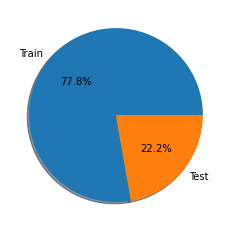

Train set (876, 20533)
Test set (219, 20533)


In [47]:
traindf, testdf = train_test_split(data, test_size = 0.2)
labels = 'Train', 'Test'
plt.pie([70, 20], labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()
print("Train set", traindf.shape)
print("Test set", testdf.shape)

Class
Healthy     112
TNBC        116
non-TNBC    867
dtype: int64


C:\Users\biozi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


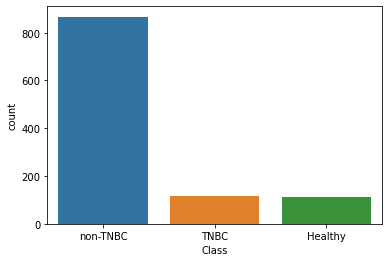

In [36]:
print(data.groupby('Class').size())
sns.countplot(data['Class'],label="Count")
plt.show()

Class
Healthy      88
TNBC         91
non-TNBC    697
dtype: int64


C:\Users\biozi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


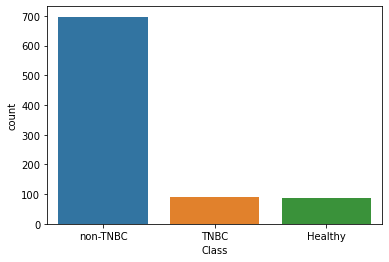

In [48]:
print(traindf.groupby('Class').size())
sns.countplot(traindf['Class'],label="Count")
plt.show()

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.30, random_state=21)


In [64]:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kfold = KFold(data.shape[0], n_splits=5)
  error = []
  for train, test in kfold.split(data[predictors]):
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome])

In [66]:
data.shape[0]

1095

In [67]:
predictor_var = X[0:-1]
outcome_var='Class'
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)

KeyboardInterrupt: 

In [65]:
predictor_var  = X.columns[0:10]
outcome_var='Class'
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 100.000%


ValueError: Cannot have number of splits n_splits=876 greater than the number of samples: n_samples=766.